In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 40
import numpy as np
import os,random, math
from tqdm import tqdm
from copy import deepcopy
from collections import Counter

# Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
plt.rcParams['font.family'] = 'NanumGothic'
import platform
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

# from dataprep.eda import plot, plot_correlation, plot_missing

import plotly 
import plotly.express as px
# from plotly import tools, subplots
# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# from plotly.offline import init_notebook_mode, iplot
# import plotly.graph_objs as go
# import plotly.express as px

# Warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


In [105]:
test = pd.read_csv("/Users/seungji/Desktop/Dacon/Daesamanlap/ProcessedData/merged_test.csv")
train = pd.read_csv("/Users/seungji/Desktop/Dacon/Daesamanlap/ProcessedData/merged_train.csv")

In [107]:
tr_gr = train.groupby("단지코드").mean().reset_index()
tst_gr = test.groupby("단지코드").mean().reset_index()
지역 = []
for d in train.단지코드.unique():
    지역.append(train.loc[train.단지코드 == d,"지역"].unique()[0])
tr_gr["지역"] = 지역
자격유형 = []
for d in train.단지코드.unique():
    자격유형.append(train.loc[train.단지코드 == d,"자격유형"].unique()[0])
tr_gr["자격유형"] = 자격유형

공급유형 = []
for d in train.단지코드.unique():
    공급유형.append(train.loc[train.단지코드 == d,"공급유형"].unique()[0])
tr_gr["공급유형"] = 공급유형

tr_gr["전용면적_std"] = train.groupby("단지코드").std().reset_index()["전용면적"]
tr_gr["전용면적별세대수_std"] = train.groupby("단지코드").std().reset_index()["전용면적별세대수"]
tr_gr["임대보증금_std"] = train.groupby("단지코드").std().reset_index()["임대보증금"]
tr_gr["임대료_std"] = train.groupby("단지코드").std().reset_index()["임대료"]
tst_gr["전용면적_std"] = test.groupby("단지코드").std().reset_index()["전용면적"]
tst_gr["전용면적별세대수_std"] = test.groupby("단지코드").std().reset_index()["전용면적별세대수"]
tst_gr["임대보증금_std"] = test.groupby("단지코드").std().reset_index()["임대보증금"]
tst_gr["임대료_std"] = test.groupby("단지코드").std().reset_index()["임대료"]
tr_re = pd.concat([train.단지코드,pd.get_dummies(train["지역"])],axis=1).groupby("단지코드").sum()
tst_re = pd.concat([test.단지코드,pd.get_dummies(test["지역"])],axis=1).groupby("단지코드").sum()
tr_re[tr_re>0] = 1
tst_re[tst_re>0] = 1
tr_gr = tr_gr.merge(tr_re, left_on = "단지코드",right_on ="단지코드",how = "left")
tst_gr =tst_gr.merge(tst_re, left_on = "단지코드",right_on ="단지코드",how = "left")
tr_apart = pd.concat([train.단지코드,pd.get_dummies(train["임대건물구분"])],axis=1).groupby("단지코드").sum().reset_index()
tst_apart = pd.concat([test.단지코드,pd.get_dummies(test["임대건물구분"])],axis=1).groupby("단지코드").sum().reset_index()
tr_gr = tr_gr.merge(tr_apart, left_on = "단지코드",right_on ="단지코드",how = "left")
tst_gr =tst_gr.merge(tst_apart, left_on = "단지코드",right_on ="단지코드",how = "left")
tr_gong = pd.concat([train.단지코드, pd.get_dummies(train["공급유형"])],axis =1)
tst_gong = pd.concat([test.단지코드, pd.get_dummies(test["공급유형"])],axis =1)
tr_gong["공공임대(5년,10년)"] = tr_gong["공공임대(5년)"]+tr_gong["공공임대(10년)"]
tst_gong["공공임대(5년,10년)"] = tr_gong["공공임대(10년)"]
tr_gong = tr_gong[['단지코드',   '공공임대(50년)',  '공공임대(분납)',
       '국민임대', '영구임대', '임대상가',  '행복주택', '공공임대(5년,10년)']]
tst_gong = tst_gong[['단지코드',   '공공임대(50년)',  '공공임대(분납)',
       '국민임대', '영구임대', '임대상가',  '행복주택', '공공임대(5년,10년)']]
tr_gong = tr_gong.groupby("단지코드").sum()
tst_gong = tst_gong.groupby("단지코드").sum()
tr_gong[tr_gong>0] = 1
tst_gong[tst_gong>0] = 1
tr_gong = tr_gong.reset_index()
tst_gong = tst_gong.reset_index()

tr_gr = tr_gr.merge(tr_gong, left_on = "단지코드",right_on ="단지코드",how = "left")
tst_gr =tst_gr.merge(tst_gong, left_on = "단지코드",right_on ="단지코드",how = "left")

tr_ja = pd.concat([train.단지코드,pd.get_dummies(train["자격유형"])],axis=1).groupby("단지코드").sum()
tst_ja = pd.concat([test.단지코드,pd.get_dummies(test["자격유형"])],axis=1).groupby("단지코드").sum()

tr_ja[tr_ja>0] = 1
tst_ja[tst_ja>0] = 1

tr_ja = tr_ja[tst_ja.columns]
tr_ja = tr_ja.reset_index()
tst_ja = tst_ja.reset_index()

tr_gr = tr_gr.merge(tr_ja, left_on = "단지코드",right_on ="단지코드",how = "left")
tst_gr =tst_gr.merge(tst_ja, left_on = "단지코드",right_on ="단지코드",how = "left")
tr_gr =tr_gr.drop("서울특별시",axis=1)

tr_gr.loc[tr_gr.전용면적_std.isna(),"전용면적_std"] = 0
tr_gr.loc[tr_gr.전용면적별세대수_std.isna(),"전용면적별세대수_std"] = 0
tr_gr.loc[tr_gr.임대보증금_std.isna(),"임대보증금_std"] = 0
tr_gr.loc[tr_gr.임대료_std.isna(),"임대료_std"] = 0

In [108]:
train = tr_gr

In [109]:
train.columns

Index(['단지코드', '총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '지하철역',
       '버스정류장', '단지내주차면수', '등록차량수', '연면적', '위도', '경도', 'subway_dist', '환승역 수',
       '총인구수', '세대당_인구', '남/여비율', '남/여_0~19세', '남/여_20~39세', '남/여_40~69세',
       '남/여_70세이상', '0~19세_비율', '20~39세_비율', '40~69세_비율', '70세이상_비율', '지역',
       '자격유형', '공급유형', '전용면적_std', '전용면적별세대수_std', '임대보증금_std', '임대료_std',
       '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도', '상가',
       '아파트', '공공임대(50년)', '공공임대(분납)', '국민임대', '영구임대', '임대상가', '행복주택',
       '공공임대(5년,10년)', 'A', 'C', 'D', 'E', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N'],
      dtype='object')

In [110]:
train.지역.unique()

array(['경상남도', '대전광역시', '경기도', '전라북도', '강원도', '광주광역시', '충청남도', '부산광역시',
       '제주특별자치도', '울산광역시', '충청북도', '전라남도', '경상북도', '대구광역시', '서울특별시',
       '세종특별자치시'], dtype=object)

In [111]:
train.지역.nunique()

16

In [112]:
train["등록차량수/총세대수"] = train["등록차량수"]/train["총세대수"]
train["등록차량수/연면적"] = train["등록차량수"]/train["연면적"]
train["임대보증금/임대료"] = train["임대보증금"]/train["임대료"]


In [113]:
train["지역구분"] = [0]*len(train)
train.loc[train.지역.isin(['경상남도', '경기도', '전라북도', '강원도',  '충청남도','제주특별자치도',  '충청북도', '전라남도', '경상북도', '세종특별자치시']),"지역구분"] = "8도"
train.loc[train.지역.isin(['대전광역시', '광주광역시', '울산광역시', '대구광역시', '서울특별시','부산광역시']),"지역구분"] = "광역시"


In [122]:
지역order =  ['경상남도', '경기도', '전라북도', '강원도',  '충청남도','제주특별자치도',  '충청북도', '전라남도', '경상북도', '세종특별자치시','대전광역시', '광주광역시', '울산광역시', '대구광역시', '서울특별시','부산광역시']

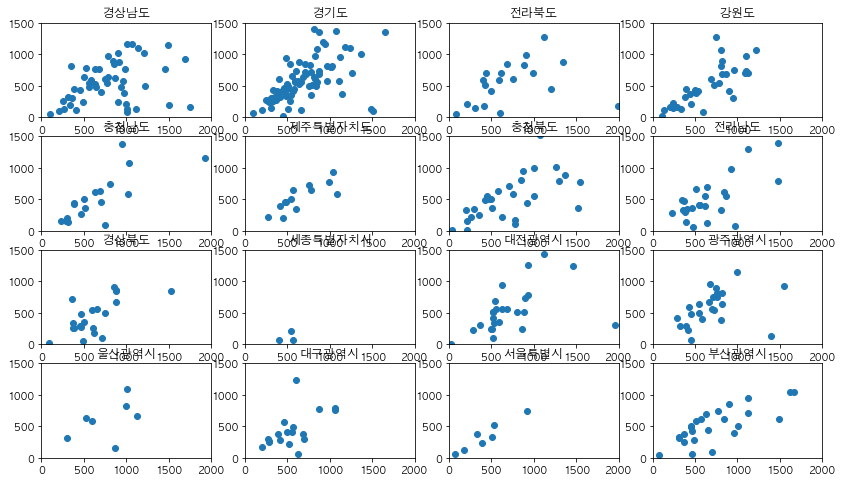

In [123]:
for i,r in enumerate(지역order):
    plt.subplot(4,4,i+1)
    tmp = train[train.지역 == r]
    plt.scatter(tmp.총세대수,tmp.등록차량수)
    plt.xlim([0, 2000])
    plt.ylim([0, 1500])
    plt.title(r)

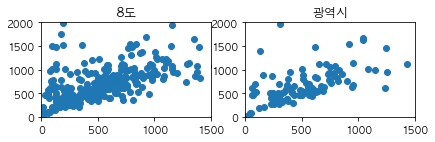

In [90]:
for i,r in enumerate(train.지역구분.unique()):
    plt.subplot(4,4,i+1)
    tmp = train[train.지역구분 == r]
    plt.scatter(tmp.등록차량수,tmp.총세대수)
    plt.ylim([0, 2000])
    plt.xlim([0, 1500])
    plt.title(r)

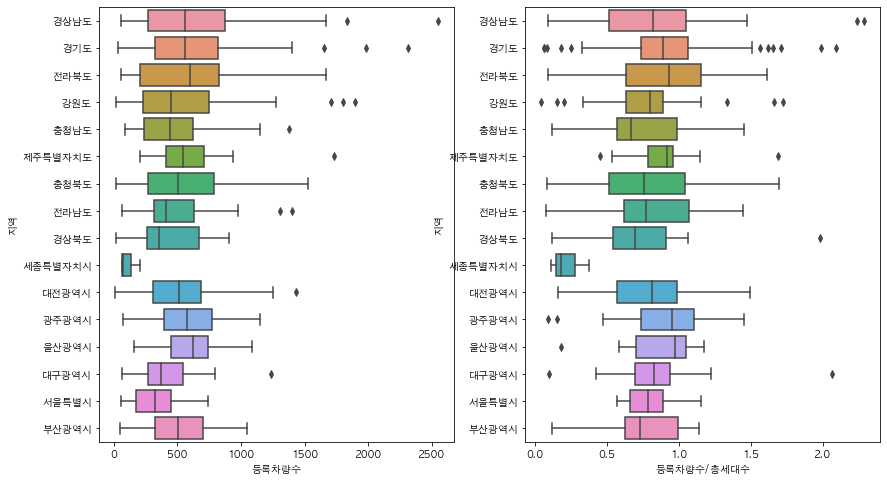

In [149]:
plt.subplot(1,2,1)
sns.boxplot(x = "등록차량수",y = "지역",data = train,order = ['경상남도', '경기도', '전라북도', '강원도',  '충청남도','제주특별자치도',  '충청북도', '전라남도', '경상북도', '세종특별자치시','대전광역시', '광주광역시', '울산광역시', '대구광역시', '서울특별시','부산광역시'])
plt.subplot(1,2,2)
sns.boxplot(x = "등록차량수/총세대수",y = "지역",data = train,order = ['경상남도', '경기도', '전라북도', '강원도',  '충청남도','제주특별자치도',  '충청북도', '전라남도', '경상북도', '세종특별자치시','대전광역시', '광주광역시', '울산광역시', '대구광역시', '서울특별시','부산광역시'])
plt.show()

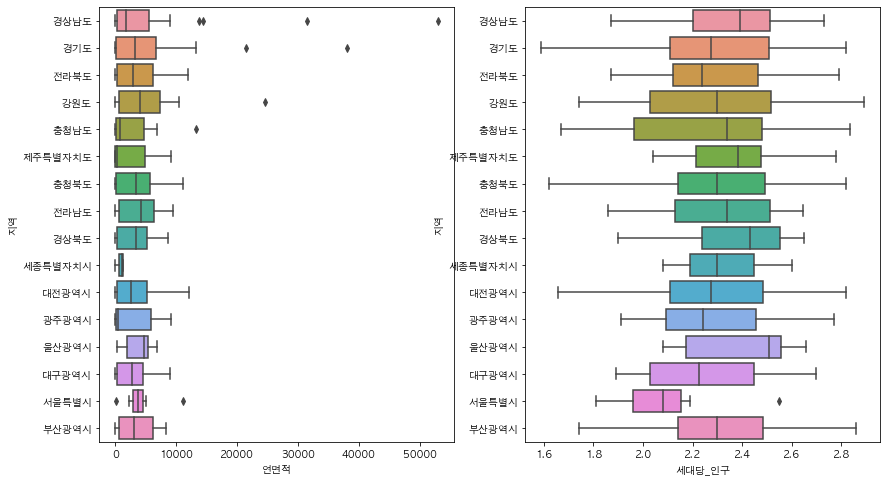

In [147]:
plt.subplot(1,2,1)
sns.boxplot(x = "연면적",y = "지역",data = train,order = ['경상남도', '경기도', '전라북도', '강원도',  '충청남도','제주특별자치도',  '충청북도', '전라남도', '경상북도', '세종특별자치시','대전광역시', '광주광역시', '울산광역시', '대구광역시', '서울특별시','부산광역시'])
plt.subplot(1,2,2)
sns.boxplot(x = "세대당_인구",y = "지역",data = train,order = ['경상남도', '경기도', '전라북도', '강원도',  '충청남도','제주특별자치도',  '충청북도', '전라남도', '경상북도', '세종특별자치시','대전광역시', '광주광역시', '울산광역시', '대구광역시', '서울특별시','부산광역시'])
plt.show()

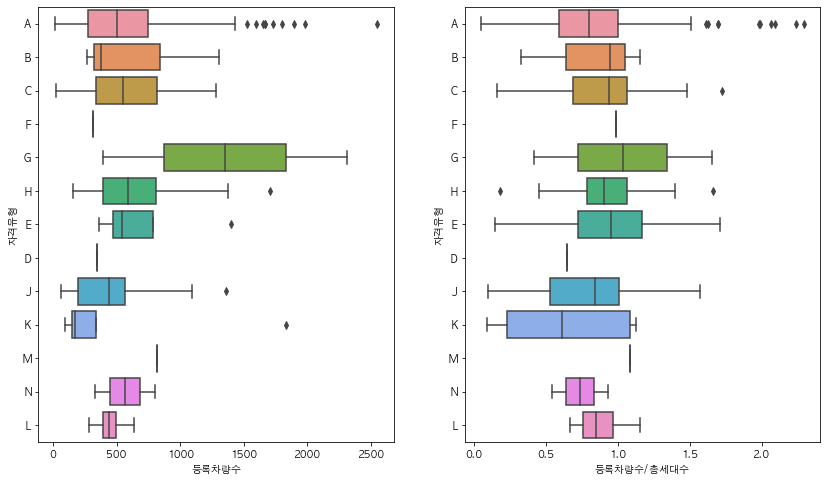

In [115]:
plt.subplot(1,2,1)
sns.boxplot(x = "등록차량수",y = "자격유형",data = train)
plt.subplot(1,2,2)
sns.boxplot(x = "등록차량수/총세대수",y = "자격유형",data = train)

plt.show()

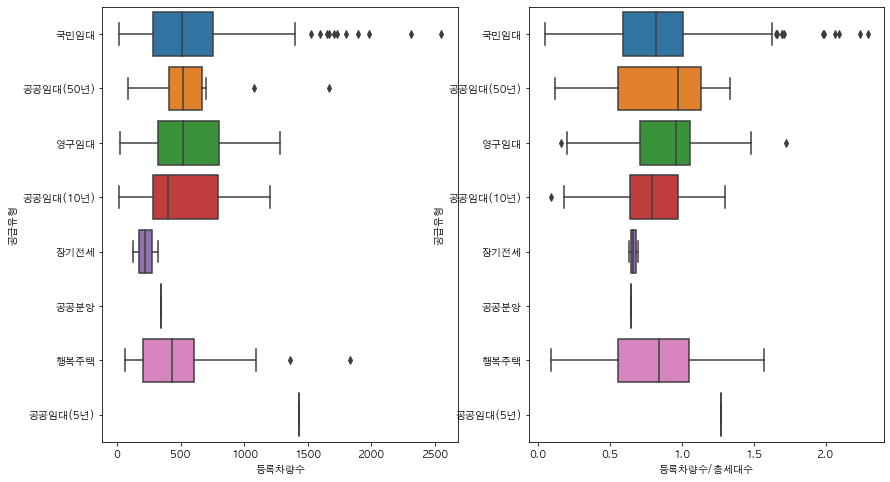

In [116]:
plt.subplot(1,2,1)
sns.boxplot(x = "등록차량수",y = "공급유형",data = train)
plt.subplot(1,2,2)
sns.boxplot(x = "등록차량수/총세대수",y = "공급유형",data = train)

plt.show()

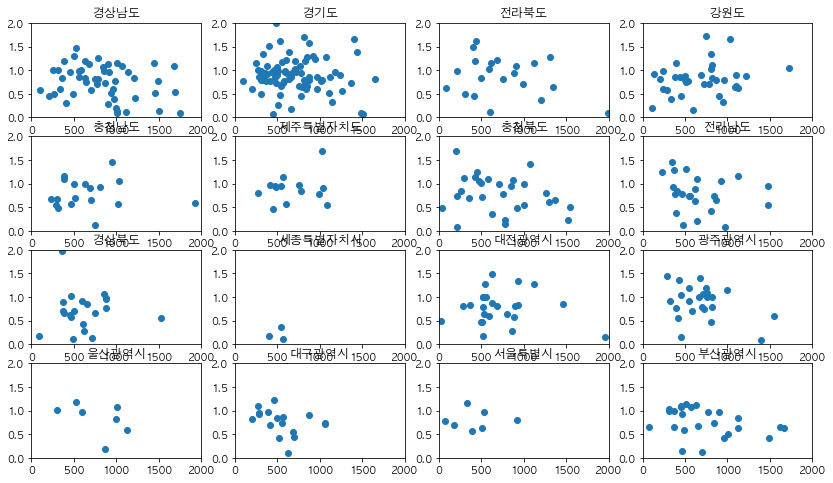

In [127]:
for i,r in enumerate(지역order):
    plt.subplot(4,4,i+1)
    tmp = train[train.지역 == r]
    plt.scatter(tmp.총세대수,tmp["등록차량수/총세대수"])
    plt.xlim([0, 2000])
    plt.ylim([0, 2])
    plt.title(r)

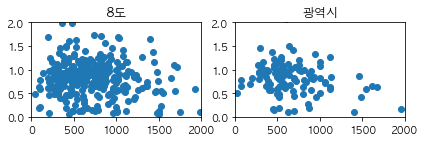

In [129]:
for i,r in enumerate(train.지역구분.unique()):
    plt.subplot(4,4,i+1)
    tmp = train[train.지역구분 == r]
    plt.scatter(tmp.총세대수,tmp["등록차량수/총세대수"])
    plt.xlim([0, 2000])
    plt.ylim([0, 2])
    plt.title(r)

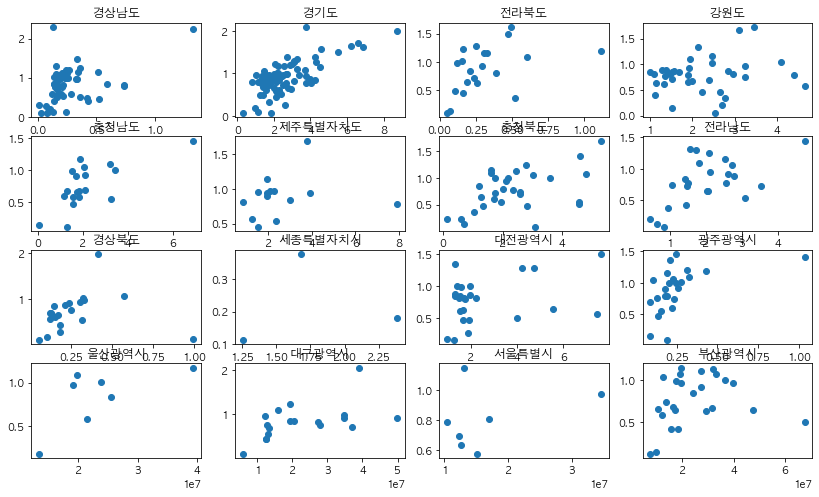

In [131]:
for i,r in enumerate(지역order):
    plt.subplot(4,4,i+1)
    tmp = train[train.지역 == r]
    plt.scatter(tmp.임대보증금,tmp["등록차량수/총세대수"])
    plt.title(r)

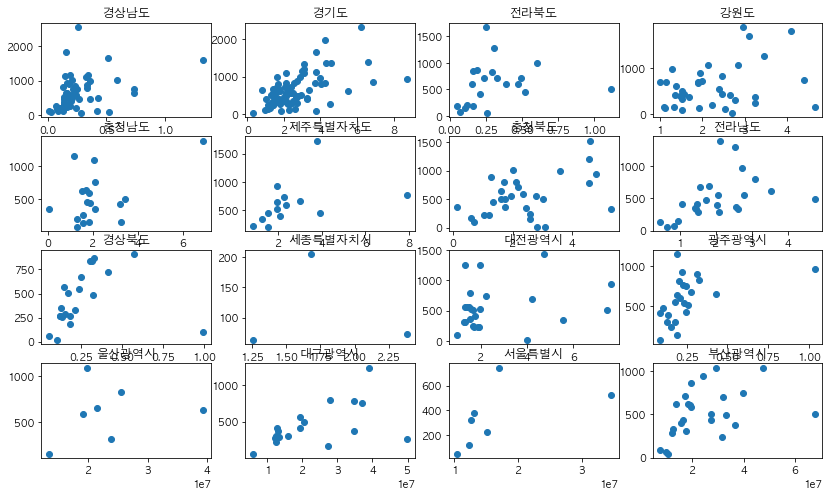

In [135]:
for i,r in enumerate(지역order):
    plt.subplot(4,4,i+1)
    tmp = train[train.지역 == r]
    plt.scatter(tmp.임대보증금,tmp.등록차량수)
    #plt.xlim([0, 2000])
    #plt.ylim([0, 1500])
    plt.title(r)

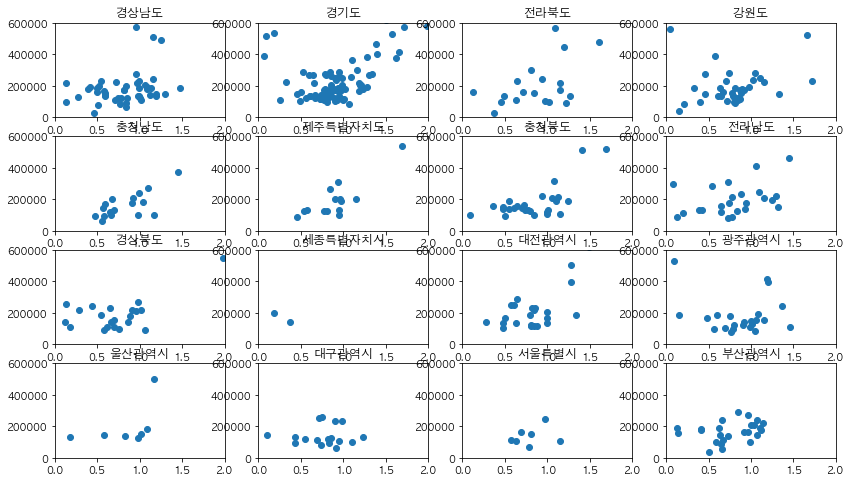

In [138]:
for i,r in enumerate(지역order):
    plt.subplot(4,4,i+1)
    tmp = train[train.지역 == r]
    plt.scatter(tmp["등록차량수/총세대수"],tmp.임대료)
    plt.xlim([0,2])
    plt.ylim([0,600000])
    plt.title(r)

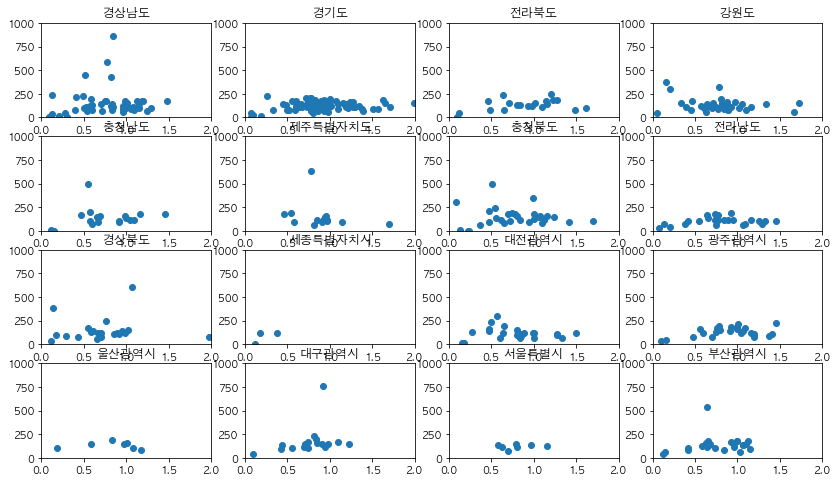

In [142]:
for i,r in enumerate(지역order):
    plt.subplot(4,4,i+1)
    tmp = train[train.지역 == r]
    plt.scatter(tmp["등록차량수/총세대수"],tmp["임대보증금/임대료"])
    plt.xlim([0,2])
    plt.ylim([0,1000])
    plt.title(r)

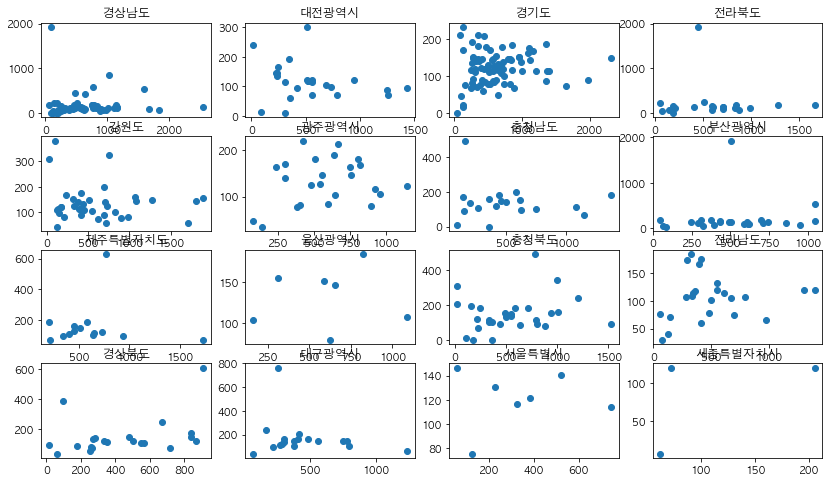

In [70]:
for i,r in enumerate(train.지역.unique()):
    plt.subplot(4,4,i+1)
    tmp = train[train.지역 == r]
    plt.scatter(tmp["등록차량수"],tmp["임대보증금/임대료"])
    plt.ylim([0, 2000])
    plt.xlim([0, 1500])
    plt.title(r)

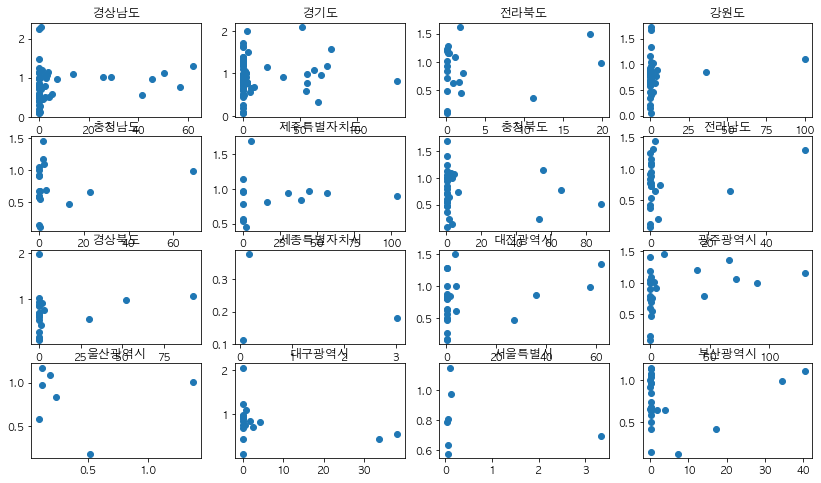

In [143]:
for i,r in enumerate(지역order):
    plt.subplot(4,4,i+1)
    tmp = train[train.지역 == r]
    plt.scatter(tmp["등록차량수/연면적"],tmp["등록차량수/총세대수"])
    plt.title(r)

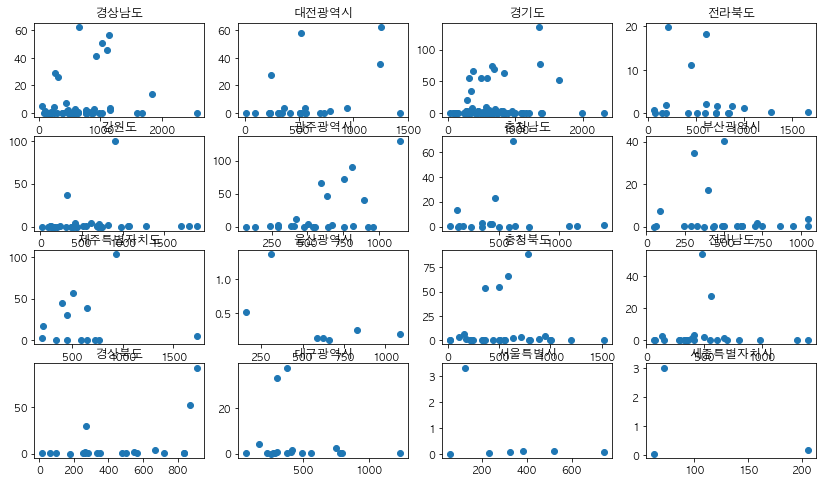

In [72]:
for i,r in enumerate(train.지역.unique()):
    plt.subplot(4,4,i+1)
    tmp = train[train.지역 == r]
    plt.scatter(tmp["등록차량수"],tmp["등록차량수/연면적"])
    plt.ylim([0, 2000])
    plt.xlim([0, 1500])
    plt.title(r)

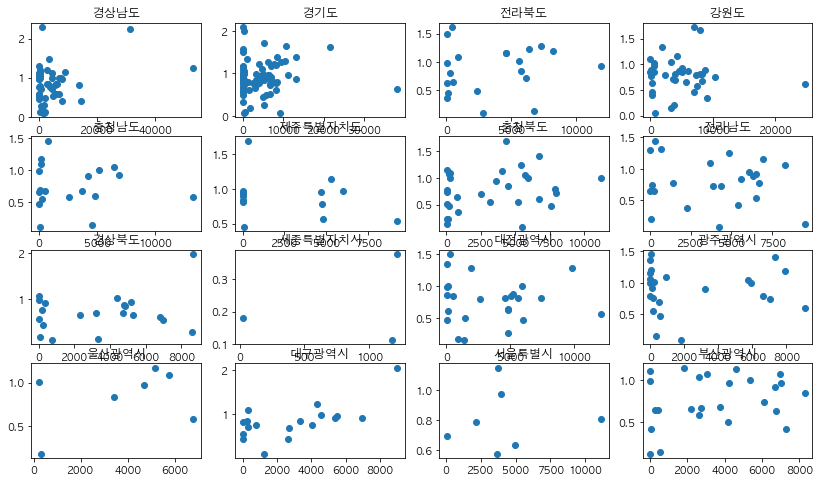

In [145]:
for i,r in enumerate(지역order):
    plt.subplot(4,4,i+1)
    tmp = train[train.지역 == r]
    plt.scatter(tmp["연면적"],tmp["등록차량수/총세대수"])
    plt.title(r)

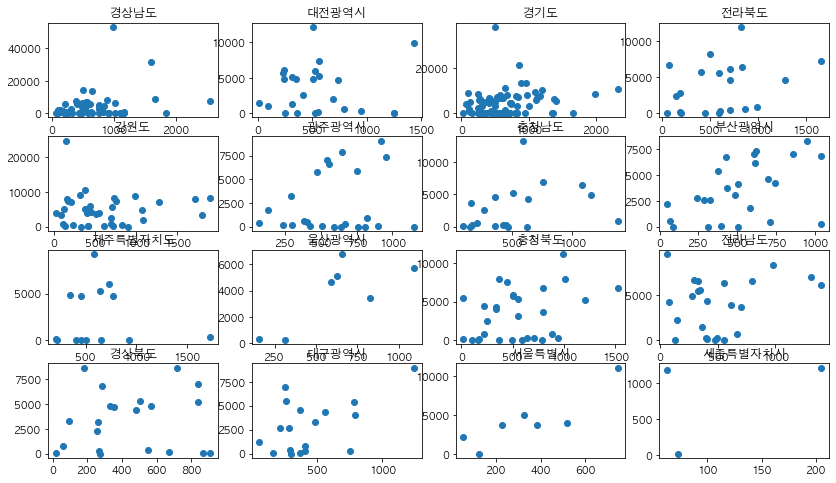

In [74]:
for i,r in enumerate(train.지역.unique()):
    plt.subplot(4,4,i+1)
    tmp = train[train.지역 == r]
    plt.scatter(tmp["등록차량수"],tmp["연면적"])
    plt.ylim([0, 2000])
    plt.xlim([0, 1500])
    plt.title(r)

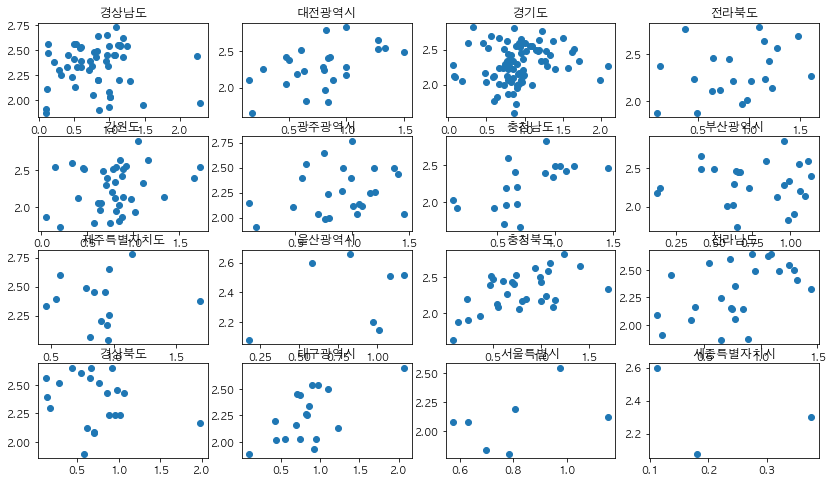

In [75]:
for i,r in enumerate(train.지역.unique()):
    plt.subplot(4,4,i+1)
    tmp = train[train.지역 == r]
    plt.scatter(tmp["등록차량수/총세대수"],tmp['세대당_인구'])
    plt.title(r)

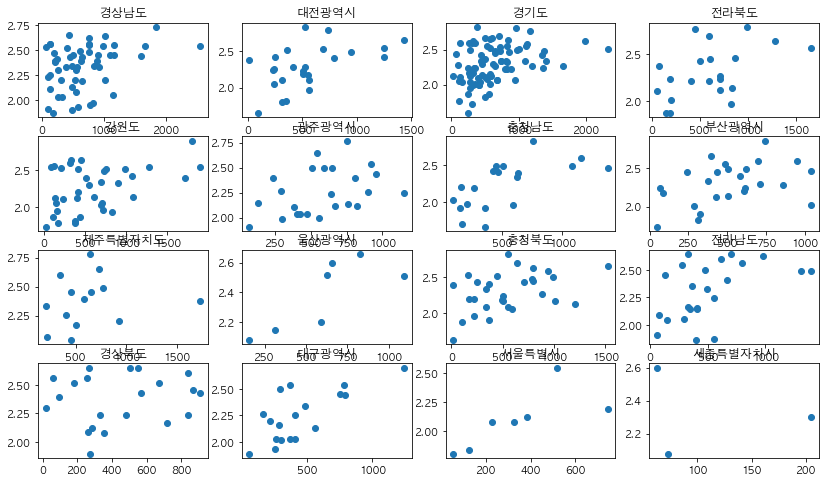

In [76]:
for i,r in enumerate(train.지역.unique()):
    plt.subplot(4,4,i+1)
    tmp = train[train.지역 == r]
    plt.scatter(tmp["등록차량수"],tmp['세대당_인구'])
    plt.ylim([0, 2000])
    plt.xlim([0, 1500])
    plt.title(r)

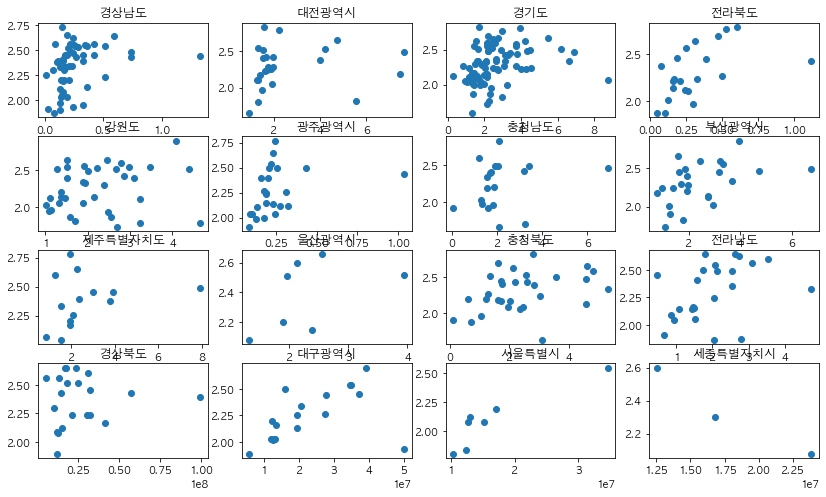

In [77]:
for i,r in enumerate(train.지역.unique()):
    plt.subplot(4,4,i+1)
    tmp = train[train.지역 == r]
    plt.scatter(tmp["임대보증금"],tmp['세대당_인구'])
    plt.title(r)

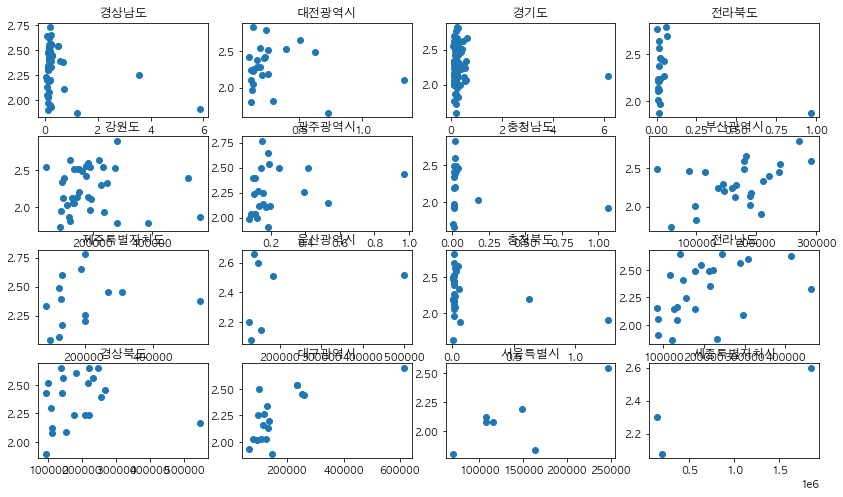

In [80]:
for i,r in enumerate(train.지역.unique()):
    plt.subplot(4,4,i+1)
    tmp = train[train.지역 == r]
    plt.scatter(tmp["임대료"],tmp['세대당_인구'])
    plt.title(r)

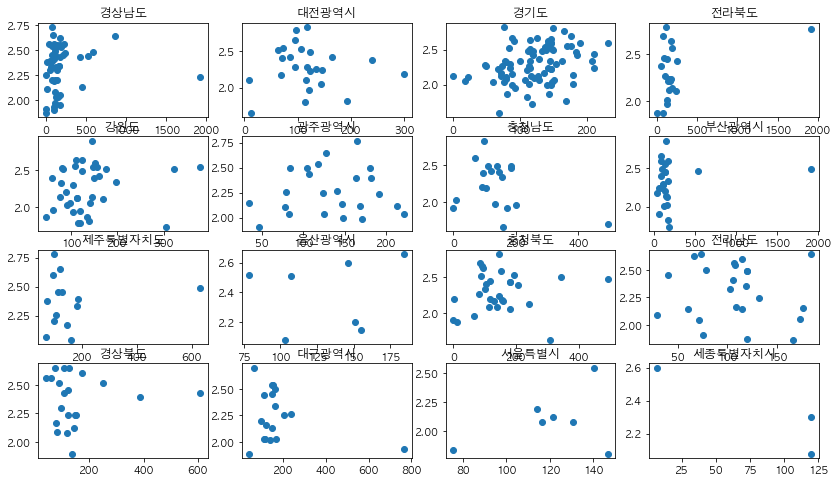

In [81]:
for i,r in enumerate(train.지역.unique()):
    plt.subplot(4,4,i+1)
    tmp = train[train.지역 == r]
    plt.scatter(tmp["임대보증금/임대료"],tmp['세대당_인구'])
    plt.title(r)